# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 node802

In [ ]:
!conda env list

## compare the of csv and hdf files

In [2]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Led3score_chembl_200k/results/LED_BB_Q99685_LED_CHEMBL200K_FULL_MODEL_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,0.975000,True,4,5,5,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",NaN,led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 5, 'reactants_generations'...","0.9750, 0.9634, 0.7850, 0.7491, 0.6810"
1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,0.994040,True,2,4,4,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",NaN,led3;led3;led3;led3,{'uspto': 2},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.6810, 0.0491"
2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,900.632254,0.000000,0,7635,10,36,2001,0,0.855335,False,9,10,9,"C[Si](C)(C)C(F)(F)F, O=C(OC(Cl)(Cl)Cl)OC(Cl)(C...",OC1Oc2ccc(Br)cc2O1,led3;led3;led3;led3;led3;led3;led3;Not in stoc...,{'uspto': 7634},"{'expansion_calls': 5634, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553"
3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,56.075864,56.075793,47,503,10,23,89,1,0.950124,True,10,6,6,"O=CCCl, c1ccc2[nH]nnc2c1, CC(C)(C)OC(=O)OC(=O)...",NaN,led3;led3;led3;led3;led3;led3,{'uspto': 502},"{'expansion_calls': 415, 'reactants_generation...","0.9501, 0.8146, 0.8144, 0.8144, 0.8144, 0.8144..."
4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,0.952371,True,7,5,5,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",NaN,led3;led3;led3;led3;led3,{'uspto': 72},"{'expansion_calls': 54, 'reactants_generations...","0.9524, 0.7918, 0.7918, 0.7624, 0.7624, 0.7624"


In [3]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [4]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Led3score_chembl_200k/results/LED_BB_Q99685_LED_CHEMBL200K_FULL_MODEL_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Led3score_chembl_200k/results/LED_BB_Q99685_LED_CHEMBL200K_FULL_MODEL_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


<PATH>/1246995/ipykernel_96173/1801331223.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_df = joined_df.append(data_hdf)


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,4,5,5,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 5, 'reactants_generations'...","0.9750, 0.9634, 0.7850, 0.7491, 0.6810","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1..."
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,2,4,4,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3,{'uspto': 2},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.6810, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'N#C..."
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,900.632254,0.000000,0,7635,10,36,2001,0,...,9,10,9,"C[Si](C)(C)C(F)(F)F, O=C(OC(Cl)(Cl)Cl)OC(Cl)(C...",OC1Oc2ccc(Br)cc2O1,led3;led3;led3;led3;led3;led3;led3;Not in stoc...,{'uspto': 7634},"{'expansion_calls': 5634, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,56.075864,56.075793,47,503,10,23,89,1,...,10,6,6,"O=CCCl, c1ccc2[nH]nnc2c1, CC(C)(C)OC(=O)OC(=O)...",,led3;led3;led3;led3;led3;led3,{'uspto': 502},"{'expansion_calls': 415, 'reactants_generation...","0.9501, 0.8146, 0.8144, 0.8144, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1..."
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,7,5,5,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3,{'uspto': 72},"{'expansion_calls': 54, 'reactants_generations...","0.9524, 0.7918, 0.7918, 0.7624, 0.7624, 0.7624","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [5]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
#hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,4,5,5,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 5, 'reactants_generations'...","0.9750, 0.9634, 0.7850, 0.7491, 0.6810","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1..."
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,2,4,4,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3,{'uspto': 2},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.6810, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'N#C..."
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,900.632254,0.000000,0,7635,10,36,2001,0,...,9,10,9,"C[Si](C)(C)C(F)(F)F, O=C(OC(Cl)(Cl)Cl)OC(Cl)(C...",OC1Oc2ccc(Br)cc2O1,led3;led3;led3;led3;led3;led3;led3;Not in stoc...,{'uspto': 7634},"{'expansion_calls': 5634, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,56.075864,56.075793,47,503,10,23,89,1,...,10,6,6,"O=CCCl, c1ccc2[nH]nnc2c1, CC(C)(C)OC(=O)OC(=O)...",,led3;led3;led3;led3;led3;led3,{'uspto': 502},"{'expansion_calls': 415, 'reactants_generation...","0.9501, 0.8146, 0.8144, 0.8144, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1..."
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,7,5,5,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3;led3,{'uspto': 72},"{'expansion_calls': 54, 'reactants_generations...","0.9524, 0.7918, 0.7918, 0.7624, 0.7624, 0.7624","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


## calculate results on full data

In [6]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

30650

In [7]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  30.65


<AxesSubplot:>

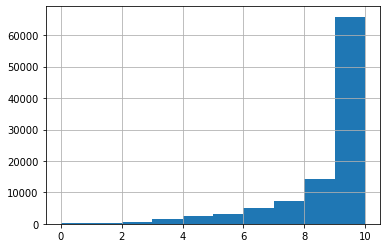

In [8]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

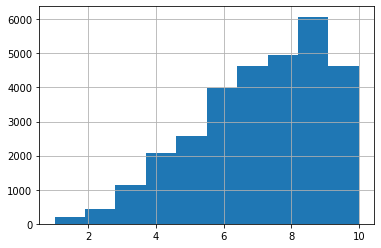

In [9]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [10]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/generated_molecules/Q99685_chembl200k_led3score_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3Scorer,XGBClassifier,XGBRegressor,SA,SMILES,clean_smiles,clean_smiles_inchi
0,0.986599,0.951234,7.251957,2.446728,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...
1,0.978048,0.971914,7.514136,2.491824,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21..."
2,0.286235,0.911148,7.518158,3.892765,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25..."
3,0.735008,0.967543,7.543328,2.930797,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...
4,0.946415,0.974222,7.636827,2.810514,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...


In [11]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

AssertionError: The target column and clean_smiles columns are not the same

In [12]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
14139,9,CCOCCCC(C1=C2C=C3C(F)=C1C31CC3C4CC(F)(F)NC2C43...,901.573083,0.0,0,4275,10,23,1062,0,...,10,7,6,"O=C(O)CBr, CC(C)(C)OC(=O)OC(=O)OC(C)(C)C, CCI,...",CC(C)(C)[Si](C)(C)OC12CC(N(NC(=O)C3CCN3C(=O)O)...,led3;led3;led3;led3;led3;led3;Not in stock,{'uspto': 4274},"{'expansion_calls': 3230, 'reactants_generatio...","0.8144, 0.8144, 0.7940, 0.7926, 0.7926","[{'type': 'mol', 'hide': False, 'smiles': 'CCO..."
16379,9,CSCCC1OC2(OC(F)(F)F)c3c(O)cc4c2c3c4=C2CC(C3C4=...,901.049849,0.0,0,8658,10,33,3137,0,...,9,8,7,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",CSCCC1OC2(OC(F)(F)F)C3=c4c2c(O)cc3c4=C2CC(C3C4...,led3;led3;led3;led3;led3;led3;Not in stock;led3,{'uspto': 8657},"{'expansion_calls': 5521, 'reactants_generatio...","0.8316, 0.8316, 0.8314, 0.8314, 0.8314, 0.8314","[{'type': 'mol', 'hide': False, 'smiles': 'CSC..."
33689,9,CC(OF)C1OCC2OC3(CO3)C(CC1=O)C1(F)C(CCCF)NC34CC...,900.353635,0.0,0,5727,10,19,1366,0,...,9,5,4,"CC(C)(C)C(=O)O, BrC(Br)(Br)Br, CI, CC(C)(C)[Si...",COC1(O)CC2C3(CO3)OC(COC1C(C)OF)C1=C3CC45CC6(C(...,led3;led3;led3;led3;Not in stock,{'uspto': 5726},"{'expansion_calls': 4365, 'reactants_generatio...","0.7603, 0.7603, 0.7603, 0.7603, 0.7603","[{'type': 'mol', 'hide': False, 'smiles': 'CC(..."
59025,5,NCCCC=CC1CC(CCC=CN(C=CC(F)(F)F)C2c3c(OC(C(F)(F...,900.687027,0.0,0,4027,10,27,598,0,...,9,6,5,"C=CCCO, CS(=O)(=O)Cl, C=C(C)C, NC(=O)[O-], CC(...",CC(C)(C)[Si](C)(C)OCCCC=CC1CC(CCC=CN(C=CC(F)(F...,led3;led3;led3;led3;led3;Not in stock,{'uspto': 4026},"{'expansion_calls': 3434, 'reactants_generatio...","0.7920, 0.7609, 0.7609, 0.7609, 0.7609","[{'type': 'mol', 'hide': False, 'smiles': 'NCC..."
82411,1,CC12C=C3CNC(C4OC5C6=C1C=C(C1=CC=C(CCC(F)(F)F)C...,903.700129,0.0,0,3104,10,24,1127,0,...,8,4,3,"CC(C)(C)[Si](C)(C)Cl, O=C(O)c1ccco1, CC(C)(C)[...",CC(C)(C)OC(=O)N1CC2=CC3(C)C4=C5C(=O)N6CN7CC(NC...,led3;led3;Not in stock;led3,{'uspto': 3103},"{'expansion_calls': 1994, 'reactants_generatio...","0.7134, 0.7134, 0.7134, 0.7134, 0.7128, 0.7128...","[{'type': 'mol', 'hide': False, 'smiles': 'CC1..."
91929,9,CC1CC(=O)C(N2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2...,900.495476,0.0,0,7153,10,29,1815,0,...,10,9,8,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",CC1CC(O)C(N2CCNCC2)OCC2c3ccc1c2c3,led3;led3;led3;led3;led3;led3;led3;Not in stoc...,{'uspto': 7152},"{'expansion_calls': 5338, 'reactants_generatio...","0.8446, 0.8446, 0.8446, 0.8446, 0.8321, 0.8321...","[{'type': 'mol', 'hide': False, 'smiles': 'CC1..."


In [13]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [14]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]
#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")

The unique length of the inchi column:  99768
The normal length of the inchi column:  100000
No join possible!


In [18]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["LED3Chembl200kScorer"] = dataframe_with_values["LED3Scorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,precursors_availability,policy_used_counts,profiling,top_scores,trees,target_inchi,XGBClassifier,XGBRegressor,clean_smiles_inchi,LED3Chembl200kScorer
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,led3;led3;led3;led3;led3,{'uspto': 6},"{'expansion_calls': 5, 'reactants_generations'...","0.9750, 0.9634, 0.7850, 0.7491, 0.6810","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1...",InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.951234,7.251957,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,led3;led3;led3;led3,{'uspto': 2},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.6810, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'N#C...","InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.971914,7.514136,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,900.632254,0.000000,0,7635,10,36,2001,0,...,led3;led3;led3;led3;led3;led3;led3;Not in stoc...,{'uspto': 7634},"{'expansion_calls': 5634, 'reactants_generatio...","0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",0.911148,7.518158,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",0.286235
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,56.075864,56.075793,47,503,10,23,89,1,...,led3;led3;led3;led3;led3;led3,{'uspto': 502},"{'expansion_calls': 415, 'reactants_generation...","0.9501, 0.8146, 0.8144, 0.8144, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'Cc1...",InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,0.967543,7.543328,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,0.735008
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,led3;led3;led3;led3;led3,{'uspto': 72},"{'expansion_calls': 54, 'reactants_generations...","0.9524, 0.7918, 0.7918, 0.7624, 0.7624, 0.7624","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.974222,7.636827,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415


## confusion matrix

LED3Chembl200kScorer SCORER AND LED BUILDING BLOCKS --> EVALUATION IS CORRECT
The accuracy:  0.80883
The precision:  0.6528643002942502
The recall:  0.8035236541598695
The f1 score:  0.7204013280095946
The mcc:  0.5847011134420356


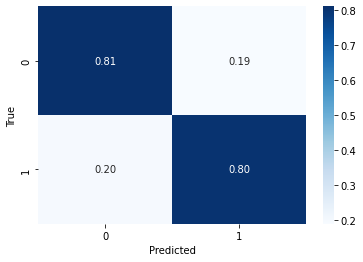

In [19]:
predicted_solved = hdf_results["LED3Chembl200kScorer"] > 0.5
solved = hdf_results["is_solved"]

print("LED3Chembl200kScorer SCORER AND LED BUILDING BLOCKS --> EVALUATION IS CORRECT")
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
## clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

In [21]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'XGBClassifier', 'XGBRegressor', 'clean_smiles_inchi',
       'LED3Chembl200kScorer', 'fingerprint', 'fingerprint_numpy_array', 'x',
       'y', 'number_of_steps_marker', 'real_index'],
      dtype='object')
100000


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,top_scores,target_inchi,XGBClassifier,XGBRegressor,clean_smiles_inchi,LED3Chembl200kScorer,x,y,number_of_steps_marker,real_index
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,"0.9750, 0.9634, 0.7850, 0.7491, 0.6810",InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.951234,7.251957,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,9.609011,8.630218,17.0,0
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,"0.9940, 0.6810, 0.0491","InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.971914,7.514136,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,9.282848,8.678146,21.0,1
2,2,O=C(OC1Oc2ccc(C(O)(C(F)(F)F)C(F)(F)F)cc2O1)C1C...,900.632254,0.000000,0,7635,10,36,2001,0,...,"0.8553, 0.8553, 0.8553, 0.8553, 0.8553, 0.8553","InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",0.911148,7.518158,"InChI=1S/C20H15F12NO7/c21-17(22,23)13(18(24,25...",0.286235,7.640357,10.324809,7.0,2
3,3,Cc1ccccc1C1CN(C(=O)n2nnc3ccccc32)CCN1,56.075864,56.075793,47,503,10,23,89,1,...,"0.9501, 0.8146, 0.8144, 0.8144, 0.8144, 0.8144...",InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,0.967543,7.543328,InChI=1S/C18H19N5O/c1-13-6-2-3-7-14(13)16-12-2...,0.735008,1.284078,4.924259,5.0,3
4,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,"0.9524, 0.7918, 0.7918, 0.7624, 0.7624, 0.7624",InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.974222,7.636827,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,8.789476,9.120907,11.0,4


In [22]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/planning_results/led3_building_blocks/LED_BB_Q99685_LED_CHEMBL200K_FULL_MODEL_results.csv"
#umapDataFrame.to_csv(save_path)

## desired molecules (LED3Chembl200kScorer, XGBClassifier > 0.8)

In [23]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))

xgb_molecules_solved = xgb_molecules[xgb_molecules["is_solved"] == True]
print("The number of molecules with a XGBClassifier score higher than 0.8 and are solved: ", len(xgb_molecules_solved))

led3_molecules = hdf_results[hdf_results["LED3Chembl200kScorer"] > 0.8]
print("The number of molecules with a LED3Chembl200kScorer score higher than 0.8: ", len(led3_molecules))
short_list = hdf_results[(hdf_results["LED3Chembl200kScorer"] > 0.8) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8: ", len(short_list))

short_list_solved = short_list[short_list["is_solved"] == True]
print("The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved: ", len(short_list_solved))

The number of molecules with a XGBClassifier score higher than 0.8:  64913
The number of molecules with a XGBClassifier score higher than 0.8 and are solved:  22202
The number of molecules with a LED3Chembl200kScorer score higher than 0.8:  26229
The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8:  18307
The number of molecules with a LED3Chembl200kScorer score higher than 0.8 and a XGBClassifier score higher than 0.8 and are solved:  14077


In [24]:
# reset index of shortlist
short_list = short_list.reset_index(drop = True)
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,trees,target_inchi,XGBClassifier,XGBRegressor,clean_smiles_inchi,LED3Chembl200kScorer,fingerprint,fingerprint_numpy_array,x,y
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,"[{'type': 'mol', 'hide': False, 'smiles': 'Cc1...",InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.951234,7.251957,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.609011,8.630218
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'N#C...","InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.971914,7.514136,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.282848,8.678146
2,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.974222,7.636827,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",8.789476,9.120907
3,5,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,521.258582,521.258513,438,4170,10,28,550,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,0.954603,7.580662,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,0.970036,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.717334,5.394235
4,9,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,0.317234,0.317163,1,5,4,1,1,1,...,"[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...",0.981139,8.006834,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...",0.956172,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",1.908524,6.406579


In [25]:
provided_short_list = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/generated_molecules/Q99685_chembl200k_led3score_400ep_final_shortlist.csv"
provided_short_list = pandas.read_csv(provided_short_list)
print(len(provided_short_list))
provided_short_list["clean_smiles_inchi"] = provided_short_list["SMILES"].apply(calculate_inchi)
provided_short_list.head()

18307


,SMILES,LED3Scorer,XGBClassifier,XGBRegressor,SA,closest_training_molecule_similarity,closest_training_molecule,clean_smiles_inchi
0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.986599,0.951234,7.251957,2.446728,0.604938,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2cccc(Oc3cccc...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...
1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.978048,0.971914,7.514136,2.491824,0.700000,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21..."
2,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,0.946415,0.974222,7.636827,2.810514,0.432432,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...
3,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,0.970036,0.954603,7.580662,2.878451,0.517241,O=C(N1CCN(Cc2ccc(Oc3ccccc3)cc2)CC1)n1nnc2c1cccc2,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...
4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,0.956172,0.981139,8.006834,2.597285,0.473684,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2..."


In [26]:
# assert that the short_list and provided_short_list are the same target_inchi and clean_smiles_inchi
assert (short_list["target_inchi"] == provided_short_list["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

In [28]:
short_list["closest_training_molecule_similarity"] = provided_short_list["closest_training_molecule_similarity"]
short_list["closest_training_molecule"] = provided_short_list["closest_training_molecule"]
short_list["SA"] = provided_short_list["SA"]
short_list.head()

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,XGBRegressor,clean_smiles_inchi,LED3Chembl200kScorer,fingerprint,fingerprint_numpy_array,x,y,closest_training_molecule_similarity,closest_training_molecule,SA
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,7.251957,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.609011,8.630218,0.604938,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2cccc(Oc3cccc...,2.446728
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,7.514136,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",9.282848,8.678146,0.700000,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,2.491824
2,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,7.636827,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",8.789476,9.120907,0.432432,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,2.810514
3,5,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,521.258582,521.258513,438,4170,10,28,550,1,...,7.580662,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,0.970036,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...",0.717334,5.394235,0.517241,O=C(N1CCN(Cc2ccc(Oc3ccccc3)cc2)CC1)n1nnc2c1cccc2,2.878451
4,9,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,0.317234,0.317163,1,5,4,1,1,1,...,8.006834,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...",0.956172,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, False, False, False, False, Fals...",1.908524,6.406579,0.473684,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,2.597285


In [29]:
# print the number of molecules in the short list
print("The number of molecules in the short list: ", len(short_list))

# get the number of molecules in the short list that are solved
print("The number of molecules in the short list that are solved:", len(short_list[short_list["is_solved"] == True]))

# percentage of solved molecules in the short list
print("The percentage of solved molecules in the short list: ", len(short_list[short_list["is_solved"] == True]) / len(short_list))

The number of molecules in the short list:  18307
The number of molecules in the short list that are solved: 14077
The percentage of solved molecules in the short list:  0.7689408423007593


<AxesSubplot:>

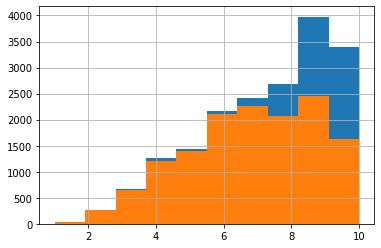

In [30]:
# hist of the number of steps for the short list
short_list["number_of_steps"].hist()

# hist in the short list that are solved
short_list[short_list["is_solved"] == True]["number_of_steps"].hist()

<AxesSubplot:>

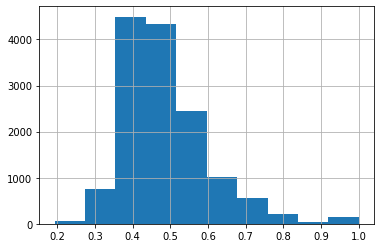

In [31]:
short_list[short_list["is_solved"] == True]["closest_training_molecule_similarity"].hist()

## umap clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = short_list, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "solved_and_unique", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor", "closest_training_molecule_similarity", "closest_training_molecule"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1


In [34]:
print(umapDataFrame.columns)

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'XGBClassifier', 'XGBRegressor', 'clean_smiles_inchi',
       'LED3Chembl200kScorer', 'fingerprint', 'fingerprint_numpy_array', 'x',
       'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'SA', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


In [35]:
print(umapDataFrame.columns)

# remove 'trees', 'molecule_results', 'fingerprint', 'fingerprint_numpy_array', columns
umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])

umapDataFrame.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees',
       'target_inchi', 'XGBClassifier', 'XGBRegressor', 'clean_smiles_inchi',
       'LED3Chembl200kScorer', 'fingerprint', 'fingerprint_numpy_array', 'x',
       'y', 'closest_training_molecule_similarity',
       'closest_training_molecule', 'SA', 'solved_and_unique',
       'number_of_steps_marker', 'real_index'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,clean_smiles_inchi,LED3Chembl200kScorer,x,y,closest_training_molecule_similarity,closest_training_molecule,SA,solved_and_unique,number_of_steps_marker,real_index
0,0,Cc1cccc(Oc2ccc(CN3CCN(C(=O)OC(C(F)(F)F)C(F)(F)...,0.479332,0.479253,1,7,5,2,2,2,...,InChI=1S/C22H22F6N2O3/c1-15-3-2-4-18(13-15)32-...,0.986599,13.284453,8.371957,0.604938,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2cccc(Oc3cccc...,2.446728,False,18.333333,0
1,1,N#Cc1ccc(CN2CCN(C(=O)OC(C(F)(F)F)C(F)(F)F)CC2)cc1,0.132268,0.132186,1,3,2,1,1,1,...,"InChI=1S/C16H15F6N3O2/c17-15(18,19)13(16(20,21...",0.978048,12.252250,8.716534,0.700000,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,2.491824,False,22.777778,1
2,4,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Nc2ccc(F)c(Cl)c...,7.567507,7.567436,6,73,10,6,19,1,...,InChI=1S/C14H13ClF7N3O2/c15-9-7-8(1-2-10(9)16)...,0.946415,8.672328,7.784143,0.432432,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,2.810514,True,11.666667,2
3,5,O=CC1(Oc2ccccc2)CCN(C(=O)n2nnc3ccccc32)CC1,521.258582,521.258513,438,4170,10,28,550,1,...,InChI=1S/C19H18N4O3/c24-14-19(26-15-6-2-1-3-7-...,0.970036,-4.725343,8.680632,0.517241,O=C(N1CCN(Cc2ccc(Oc3ccccc3)cc2)CC1)n1nnc2c1cccc2,2.878451,True,16.111111,3
4,9,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2nc3ccccc3s2)CC1,0.317234,0.317163,1,5,4,1,1,1,...,"InChI=1S/C16H15F6N3O2S/c17-15(18,19)13(16(20,2...",0.956172,6.878592,11.753752,0.473684,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,2.597285,True,18.333333,4


In [36]:
umapDataFrame.to_csv("<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/chembl200k_led3/planning_results/led3_building_blocks/LED_BB_Q99685_LED_CHEMBL200K_FULL_MODEL_results_shortlist.csv")